## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##**Data Collection and Description**

In [ ]:
df = pd.read_csv("Company_Data.csv")

In [ ]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

In [ ]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.393167,0.500510,-0.073999,0.015419,-0.015419,-0.177093,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.008683,-0.066594,0.066594,-0.016869,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,-0.051392,-0.037967,0.037967,-0.089601,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,-0.015929,-0.042035,0.042035,-0.684460,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.040640,0.052025,-0.052025,-0.060564,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,-0.006607,-0.047016,0.047016,-0.057861,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.056613,-0.028479,0.028479,-0.008652,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,0.013242,0.033094,-0.033094,0.078250,-0.078250
ShelveLoc_Bad,-0.393167,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,-0.618133,-0.081122,0.081122,-0.000979,0.000979
ShelveLoc_Good,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.571396,0.039197,-0.039197,-0.078864,0.078864


In [ ]:
df.drop(['US_No','ShelveLoc_Medium','Urban_No','Urban_Yes','Education','Population'],inplace=True,axis=1)

In [ ]:
X = df.drop('Sales',axis=1)
y = df['Sales']

##**Model Building and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)

X_scaled_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_scaled_train,y_train)
print(dtree_reg.feature_importances_)

[0.12209825 0.06417693 0.09291377 0.31753197 0.07061448 0.0449293
 0.26246436 0.02527094]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold , RandomizedSearchCV

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
min_samples_split = [3,4,5,6,7,8]
max_depth = [3,4,5,6,7]
max_features = [None,3,4,5]
n_estimators = [90,100,125,150,200]
n_jobs =[-1]

param_grid = dict(n_estimators = n_estimators, n_jobs = n_jobs, min_samples_split = min_samples_split,max_depth = max_depth,max_features= max_features,)

grid = GridSearchCV(estimator = rfr,param_grid = param_grid,cv = KFold(n_splits=5,shuffle=True), verbose = 10)
grid_result = grid.fit(X_scaled_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV] max_depth=3, max_features=None, min_samples_split=3, n_estimators=90, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, max_features=None, min_samples_split=3, n_estimators=90, n_jobs=-1, score=0.346, total=   1.2s
[CV] max_depth=3, max_features=None, min_samples_split=3, n_estimators=90, n_jobs=-1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=3, max_features=None, min_samples_split=3, n_estimators=90, n_jobs=-1, score=0.524, total=   0.3s
[CV] max_depth=3, max_features=None, min_samples_split=3, n_estimators=90, n_jobs=-1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV]  max_depth=3, max_features=None, min_samples_split=3, n_estimators=90, n_jobs=-1, score=0.467, total=   0.3s
[CV] max_depth=3, max_features=None, min_samples_split=3, n_estimators=90, n_jobs=-1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=3, max_features=None, min_samples_split=3, n_estimators=90, n_jobs=-1, score=0.495, total=   0.3s
[CV] max_depth=3, max_features=None, min_samples_split=3, n_estimators=90, n_jobs=-1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s


[CV]  max_depth=3, max_features=None, min_samples_split=3, n_estimators=90, n_jobs=-1, score=0.440, total=   0.3s
[CV] max_depth=3, max_features=None, min_samples_split=3, n_estimators=100, n_jobs=-1 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s remaining:    0.0s


[CV]  max_depth=3, max_features=None, min_samples_split=3, n_estimators=100, n_jobs=-1, score=0.341, total=   0.3s
[CV] max_depth=3, max_features=None, min_samples_split=3, n_estimators=100, n_jobs=-1 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.8s remaining:    0.0s


[CV]  max_depth=3, max_features=None, min_samples_split=3, n_estimators=100, n_jobs=-1, score=0.565, total=   0.3s
[CV] max_depth=3, max_features=None, min_samples_split=3, n_estimators=100, n_jobs=-1 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=3, max_features=None, min_samples_split=3, n_estimators=100, n_jobs=-1, score=0.448, total=   0.3s
[CV] max_depth=3, max_features=None, min_samples_split=3, n_estimators=100, n_jobs=-1 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.5s remaining:    0.0s


[CV]  max_depth=3, max_features=None, min_samples_split=3, n_estimators=100, n_jobs=-1, score=0.521, total=   0.3s
[CV] max_depth=3, max_features=None, min_samples_split=3, n_estimators=100, n_jobs=-1 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.8s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] max_depth=3, max_features=5, min_samples_split=5, n_estimators=90, n_jobs=-1 
[CV]  max_depth=3, max_features=5, min_samples_split=5, n_estimators=90, n_jobs=-1, score=0.374, total=   0.3s
[CV] max_depth=3, max_features=5, min_samples_split=5, n_estimators=90, n_jobs=-1 
[CV]  max_depth=3, max_features=5, min_samples_split=5, n_estimators=90, n_jobs=-1, score=0.523, total=   0.3s
[CV] max_depth=3, max_features=5, min_samples_split=5, n_estimators=90, n_jobs=-1 
[CV]  max_depth=3, max_features=5, min_samples_split=5, n_estimators=90, n_jobs=-1, score=0.452, total=   0.4s
[CV] max_depth=3, max_features=5, min_samples_split=5, n_estimators=90, n_jobs=-1 
[CV]  max_depth=3, max_features=5, min_samples_split=5, n_estimators=90, n_jobs=-1, score=0.492, total=   0.3s
[CV] max_depth=3, max_features=5, min_samples_split=5, n_estimators=90, n_jobs=-1 
[CV]  max_depth=3, max_features=5, min_samples_split=5, n_estimators=90, n_jobs=-1, score=

[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed: 19.9min finished


In [ ]:
grid_result.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_split': 4,
 'n_estimators': 125,
 'n_jobs': -1}

In [ ]:
rfr = RandomForestRegressor(n_estimators=100,max_depth=7, max_features=5, min_samples_split=3,n_jobs=-1)

In [ ]:
rfr.fit(X_scaled_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rfr.score(X_scaled_test,y_test)

0.702884174305761

In [ ]:
prediction = rfr.predict(X_scaled_test)

In [ ]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, prediction, squared=True)

In [ ]:
len(y_test)

132

In [ ]:
(prediction[1] - y_test.iloc[1])

-1.186511022055166

In [ ]:
y_test.iloc[1]

8.67

In [ ]:
def mean_squared_error(predict,actual):
    sum =0
    for i in range(len(predict)):
        sum = sum + (prediction[1] - y_test.iloc[1]) * (prediction[1] - y_test.iloc[1])
        
    return sum/len(predict)

In [ ]:
ssr = mean_squared_error(prediction,y_test)

In [ ]:
print(f"Sum of squared residual: {ssr}")

Sum of squared residual: 1.407808405458392


## **Random Forest for Fraud Check**

In [ ]:
df = pd.read_csv("/content/Fraud_check.csv")

In [ ]:
df['Taxable.Income'] =  ['Risky' if x<=30000 else 'Good' for x in df['Taxable.Income']]

In [ ]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [ ]:
df['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.corr()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Taxable.Income_Risky,Urban_YES
City.Population,1.000000,0.013135,0.079579,-0.007035,0.002087,0.012225,-0.040098
Work.Experience,0.013135,1.000000,-0.005362,0.033347,-0.018123,-0.001972,-0.094559
Undergrad_YES,0.079579,-0.005362,1.000000,0.015120,0.028883,0.012523,-0.000267
Marital.Status_Married,-0.007035,0.033347,0.015120,1.000000,-0.520317,0.043178,0.016771
Marital.Status_Single,0.002087,-0.018123,0.028883,-0.520317,1.000000,-0.015820,0.047014
Taxable.Income_Risky,0.012225,-0.001972,0.012523,0.043178,-0.015820,1.000000,0.004830
Urban_YES,-0.040098,-0.094559,-0.000267,0.016771,0.047014,0.004830,1.000000


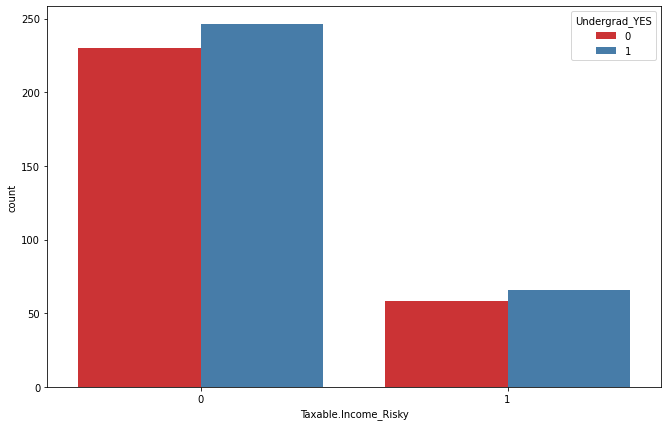

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='Taxable.Income_Risky',hue='Undergrad_YES',data=df,palette='Set1')

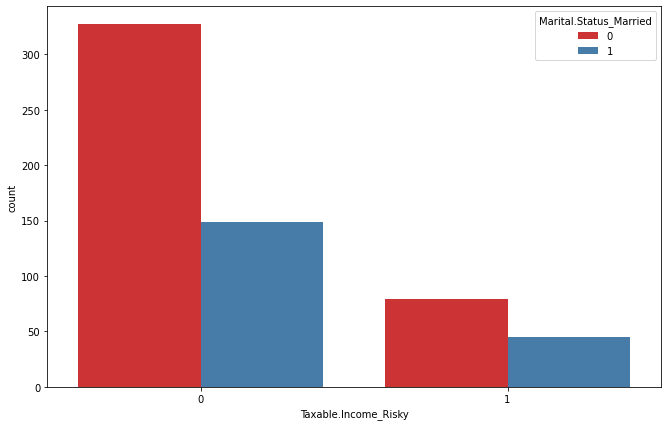

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='Taxable.Income_Risky',hue='Marital.Status_Married',data=df,palette='Set1')

In [ ]:
X = df.drop('Taxable.Income_Risky',axis=1)
y = df['Taxable.Income_Risky']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)

X_scaled_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold , RandomizedSearchCV

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
min_samples_split = [12,13,14,15,16,17,18,19,20]
max_depth = [3,4,5,6]
max_features = [3,4]
min_impurity_split=[0.15,0.20,0.25]
n_estimators=[100,150,180,200]
n_jobs=[-1]


param_grid = dict(n_estimators=n_estimators,n_jobs=n_jobs,min_samples_split = min_samples_split,max_depth = max_depth,
                  max_features= max_features,min_impurity_split=min_impurity_split)

grid = GridSearchCV(estimator = rfc,param_grid = param_grid,cv = KFold(n_splits=5,shuffle=True), verbose = 10)
grid_result = grid.fit(X_scaled_train,y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV 1/5; 1/864] START max_depth=3, max_features=3, min_impurity_split=0.15, min_samples_split=12, n_estimators=100, n_jobs=-1


ValueError: ignored

In [ ]:
grid_result.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.15,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
rfc = RandomForestClassifier(max_depth=3, max_features=3, min_impurity_split=0.15,
                       min_samples_split=12, n_jobs=-1)

In [ ]:
rfc.fit(X_scaled_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.15,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
print(rfc.feature_importances_)

[0.51545336 0.29471234 0.04797335 0.05909284 0.04304072 0.0397274 ]


In [ ]:
X_train_new = X_scaled_train[:,[0,1,3]]
X_test_new = X_scaled_test[:,[0,1,3]]

In [ ]:
rfc.fit(X_train_new,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.15,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
predict = rfc.predict(X_test_new)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predict))

print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       158
           1       0.00      0.00      0.00        40

    accuracy                           0.80       198
   macro avg       0.40      0.50      0.44       198
weighted avg       0.64      0.80      0.71       198

[[158   0]
 [ 40   0]]


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [ ]:
X_train_res, y_train_res = ros.fit_resample(X_train_new, y_train)

In [ ]:
rfc.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.15,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
probs_y = rfc.predict_proba(X_test_new)

(0.0, 1.0)

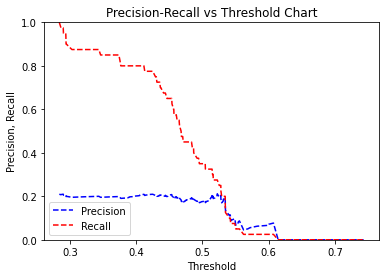

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")

plt.ylim([0,1])


In [ ]:
model = probs_y[:,1]
model = [1 if x>=0.45 else 0 for x in model]


print(classification_report(y_test,model))

print(confusion_matrix(y_test,model))

              precision    recall  f1-score   support

           0       0.81      0.37      0.50       158
           1       0.21      0.65      0.31        40

    accuracy                           0.42       198
   macro avg       0.51      0.51      0.41       198
weighted avg       0.68      0.42      0.47       198

[[ 58 100]
 [ 14  26]]
